<a href="https://colab.research.google.com/github/abhipise2704/Machine_learning-/blob/master/Home_Credit_Default_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Download the Data from Kaggle**

In [53]:
!curl --header 'Host: storage.googleapis.com' --header 'User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7' --header 'Accept-Language: en-GB,en-US;q=0.9,en;q=0.8' --header 'Referer: https://www.kaggle.com/' 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/9120/860599/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1729613052&Signature=GC%2B16t10V5DFMQ5mGggMFnMgdQ%2FNrqub%2B7spDq%2FjNTSZk8vZ9vrwqUlMJiBJbATWn0jg1MXJU1Qwc5Pap0FBEa5vSPxvxYg1KlzPzXqGwrcH5jdP91vHl8Xop3bOGC8Ch5yOvz67K%2BD9SqWEbXgepCXYjiE4ltD1oONXwB17dvbTQN2mXzix9IG3y0mxccVT%2FEuyYNe7wxnxe%2BwIiDAxNSPssEnehkJ8sXO4QK548VGEyjx7jKewc80mMmfCcBfpvH7%2FyZ7XJ0MVSrRyfyJirx%2B%2B%2FJPT57MqvF43O6pGhOkX9RFKKJ%2BtoRdMZaK1cERfQlioQsGN%2BcfsjGA14p7RXg%3D%3D&response-content-disposition=attachment%3B+filename%3Dhome-credit-default-risk.zip' -L -o 'home-credit-default-risk.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  688M  100  688M    0     0  64.7M      0  0:00:10  0:00:10 --:--:-- 76.2M


In [54]:
import zipfile
with zipfile.ZipFile("/content/home-credit-default-risk.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/home-credit-default-risk")

In [55]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.options.plotting.backend = "plotly"
%matplotlib inline

# **2.EDA: Exploatory Data Analysis**

## 2.1 Read the data

In [56]:
df=pd.read_csv("/content/home-credit-default-risk/application_train.csv")

## 2.2 Number Datapoints & Columns in the Dataset

In [57]:
print("="*50)
print("Number of rows or Datapoints in the Datasets:",df.shape[0])
print("-"*50)
print("number of columns in the datasets: ", df.shape[1])
print("="*50)

Number of rows or Datapoints in the Datasets: 307511
--------------------------------------------------
number of columns in the datasets:  122


## 2.3 Column Names & Datatype of Columns

In [58]:
print("="*80)
print("Columns Names are as follows")
print("-"*80)
pprint.pp(list(df.columns),compact=True)
print("="*80)

Columns Names are as follows
--------------------------------------------------------------------------------
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT

## 2.4 Null Value Check & Missing Value

In [59]:
print("="*50)
print("Null values in the Dataset(Percentage):")
print("-"*50)
df_null_df=pd.DataFrame(df.isnull().sum()/len(df)*100,columns=['nulls'])
print(df_null_df.sort_values(by='nulls',ascending=False))
print("="*50)

Null values in the Dataset(Percentage):
--------------------------------------------------
                                  nulls
COMMONAREA_MEDI               69.872297
COMMONAREA_AVG                69.872297
COMMONAREA_MODE               69.872297
NONLIVINGAPARTMENTS_MODE      69.432963
NONLIVINGAPARTMENTS_AVG       69.432963
NONLIVINGAPARTMENTS_MEDI      69.432963
FONDKAPREMONT_MODE            68.386172
LIVINGAPARTMENTS_MODE         68.354953
LIVINGAPARTMENTS_AVG          68.354953
LIVINGAPARTMENTS_MEDI         68.354953
FLOORSMIN_AVG                 67.848630
FLOORSMIN_MODE                67.848630
FLOORSMIN_MEDI                67.848630
YEARS_BUILD_MEDI              66.497784
YEARS_BUILD_MODE              66.497784
YEARS_BUILD_AVG               66.497784
OWN_CAR_AGE                   65.990810
LANDAREA_MEDI                 59.376738
LANDAREA_MODE                 59.376738
LANDAREA_AVG                  59.376738
BASEMENTAREA_MEDI             58.515956
BASEMENTAREA_AVG             

## 2.5 Distribution of Column Gender

<Axes: title={'center': 'Home Loan borrower by Gender'}, xlabel='CODE_GENDER'>

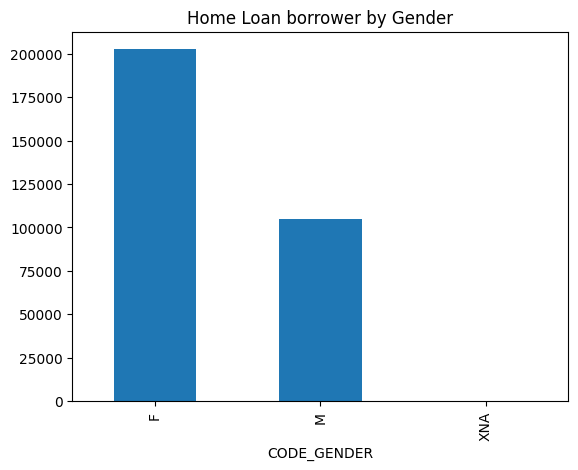

In [60]:
df['CODE_GENDER'].value_counts().plot(kind='bar',
                                      title='Home Loan borrower by Gender')

In [61]:
print("="*80)
print("% of Genderwise borrower in the Data")
print("-"*80)
print(df['CODE_GENDER'].value_counts(normalize=True)*100)
print("-"*80)

print("Counts of Genderwise borrower in the Data")
print("-"*80)
print(df['CODE_GENDER'].value_counts())
print("="*80)

% of Genderwise borrower in the Data
--------------------------------------------------------------------------------
CODE_GENDER
F      65.834393
M      34.164306
XNA     0.001301
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Counts of Genderwise borrower in the Data
--------------------------------------------------------------------------------
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


### Observations  
* There more Female Home loan borrower in the dataset

## 2.6 Distibution of Target Label

In [62]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: title={'center': 'Distribution of Target Label'}, xlabel='TARGET'>

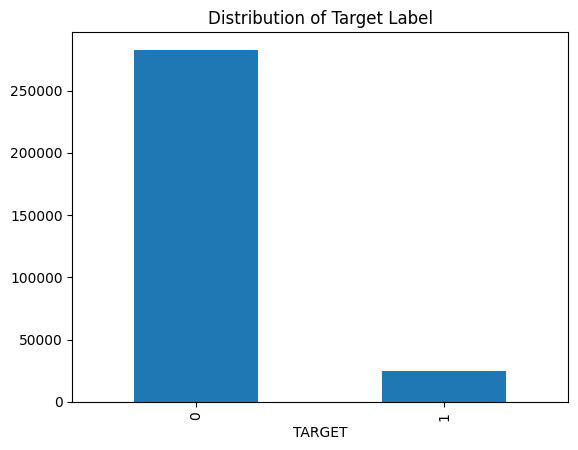

In [63]:
df['TARGET'].value_counts().plot(kind='bar',
                                 title='Distribution of Target Label')

In [64]:
print("="*80)
print("% of Credit Risk Defaulter vs Non Defaulter column Target in the Data")
print("-"*80)
print(df['TARGET'].value_counts(normalize=True)*100)
print("-"*80)

% of Credit Risk Defaulter vs Non Defaulter column Target in the Data
--------------------------------------------------------------------------------
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64
--------------------------------------------------------------------------------


### Observation:
* Data is highly imbalanced as 91.92% point belongs to zero label data---non risky (credit worthy)
* 8% belongs to Labelled as 1 data---risky (non credit worthy)

## 2.7 Gender wise Distribution by the Target Label

In [65]:
df.groupby(['TARGET','CODE_GENDER']).size()/len(df)*100

TARGET  CODE_GENDER
0       F              61.226428
        M              30.699390
        XNA             0.001301
1       F               4.607965
        M               3.464917
dtype: float64

In [66]:
df.groupby(['TARGET','CODE_GENDER']).size()\
                        .groupby(level=0)\
                        .apply(lambda x: x / x.sum() * 100)

TARGET  TARGET  CODE_GENDER
0       0       F              66.603228
                M              33.395357
                XNA             0.001415
1       1       F              57.079557
                M              42.920443
dtype: float64

### Observation:
* If label is 1 then 57.07% Females have problems while repaying the Home Loan
* if Label is 1 then 42.92% Males have problems while repaying the Home Loan

## 2.8 Which loan type(NAME_CONTRACT_TYPE) is likely more Risky

In [67]:
print("="*80)
print("% of NAME_CONTRACT_TYPE or types of Loans in the Data")
print("-"*80)
print(df['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100)
print("-"*80)

% of NAME_CONTRACT_TYPE or types of Loans in the Data
--------------------------------------------------------------------------------
NAME_CONTRACT_TYPE
Cash loans         90.478715
Revolving loans     9.521285
Name: proportion, dtype: float64
--------------------------------------------------------------------------------


In [68]:
df.groupby(['TARGET','NAME_CONTRACT_TYPE']).size().groupby(level=0)\
                                .apply(lambda x: x / x.sum() * 100)

TARGET  TARGET  NAME_CONTRACT_TYPE
0       0       Cash loans            90.209986
                Revolving loans        9.790014
1       1       Cash loans            93.538771
                Revolving loans        6.461229
dtype: float64

### Observation:
* If label is 1 then is 93.53% Cash Loans are have problems while repaying the Home Loan
* If label is 1 then 6.46 Revolving loans are have problems while repaying the Home Loan

## 2.9 Education Type & Target Labels

In [69]:
print("="*80)
print("Counts of NAME_EDUCATION_TYPE in the Data")
print("-"*80)
print(df['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100)
print("-"*80)

Counts of NAME_EDUCATION_TYPE in the Data
--------------------------------------------------------------------------------
NAME_EDUCATION_TYPE
Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: proportion, dtype: float64
--------------------------------------------------------------------------------


In [70]:
# NAME_EDUCATION_TYPE
df.groupby(['TARGET', 'NAME_EDUCATION_TYPE']).size()\
                                .groupby(level=0)\
                                .apply(lambda x: x / x.sum() * 100)

TARGET  TARGET  NAME_EDUCATION_TYPE          
0       0       Academic degree                   0.056954
                Higher education                 25.064559
                Incomplete higher                 3.327013
                Lower secondary                   1.202394
                Secondary / secondary special    70.349080
1       1       Academic degree                   0.012085
                Higher education                 16.149043
                Incomplete higher                 3.512588
                Lower secondary                   1.679758
                Secondary / secondary special    78.646526
dtype: float64

### Observation:
* If label is 1(Risky) & education type is Secondary / secondary special then 78.64%
* If label is 1 (Risky) & 6.46 Education type then Higher education 16.14% are house.

In [71]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2.10 Counts of Occupation type in the Dataset

<Axes: title={'center': '% Wise Distirbtion of OCCUPATION_TYPE'}, xlabel='OCCUPATION_TYPE'>

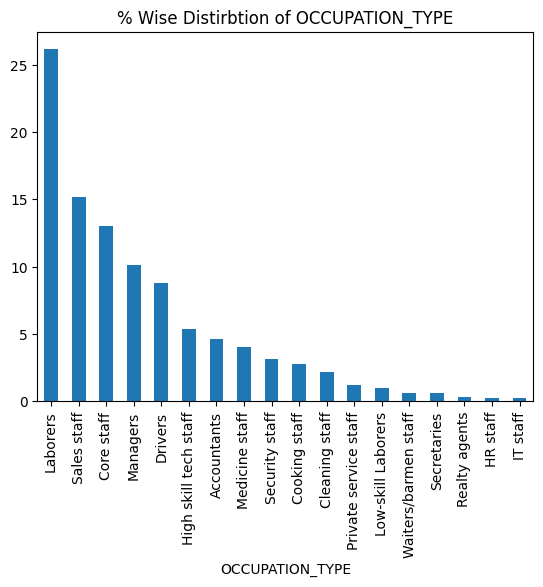

In [72]:
df['OCCUPATION_TYPE'].value_counts(normalize=True)\
                        .mul(100)\
                        .plot( kind='bar',
                              title='% Wise Distirbtion of OCCUPATION_TYPE')

### Observation:
* Loan Borrowers 26.13% are Laborers followed by Sales staff 15%
* Least is IT Staff 0.29%

## 2.11 Percentwise Distribution of Income Type

<Axes: title={'center': '% Wise Distirbtion of NAME_INCOME_TYPE'}, xlabel='NAME_INCOME_TYPE'>

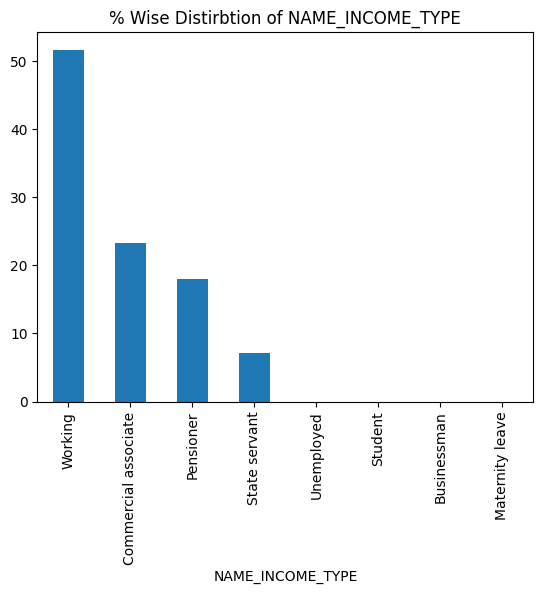

In [73]:
df['NAME_INCOME_TYPE'].value_counts(normalize=True)\
                        .mul(100)\
                        .plot(kind='bar',
                              title='% Wise Distirbtion of NAME_INCOME_TYPE')

In [74]:
# NAME_INCOME_TYPE
df.groupby(['TARGET', 'NAME_INCOME_TYPE']).size()\
                                .groupby(level=0)\
                                .apply(lambda x: x / x.sum() * 100)

TARGET  TARGET  NAME_INCOME_TYPE    
0       0       Businessman              0.003537
                Commercial associate    23.438373
                Maternity leave          0.001061
                Pensioner               18.529393
                State servant            7.235590
                Student                  0.006367
                Unemployed               0.004952
                Working                 50.780725
1       1       Commercial associate    21.591138
                Maternity leave          0.008056
                Pensioner               12.012085
                State servant            5.031219
                Unemployed               0.032226
                Working                 61.325277
dtype: float64

## 2.12 Distribution of AMT_INCOME_TOTAL using BoxPlot

In [75]:
# AMT_INCOME_TOTAL

In [76]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<Axes: title={'center': 'Boxplot of AMT_INCOME_TOTAL'}>

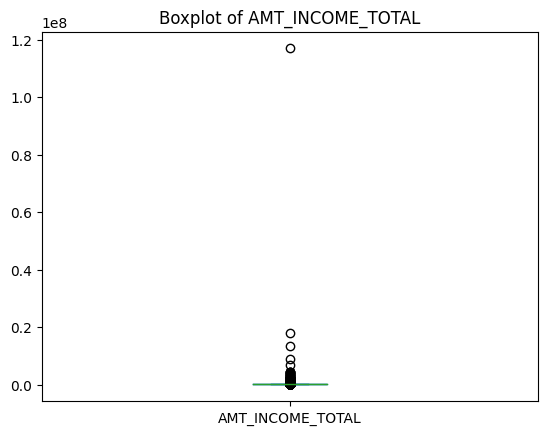

In [77]:
df['AMT_INCOME_TOTAL'].plot(kind='box',title='Boxplot of AMT_INCOME_TOTAL')

# **3. Data Preprocessing & Feature Engineering**

## 3.1 Missing value column selection based on 0.5 threshold

In [78]:
print("="*80)
print("Dataset size before removing missing Value Column",df.shape)
print("-"*80)
limitPer = len(df) * 0.55
df_selected = df.dropna(thresh=limitPer, axis=1)
print("Dataset size After removing missing Value Column",df_selected.shape)
print("="*80)

Dataset size before removing missing Value Column (307511, 122)
--------------------------------------------------------------------------------
Dataset size After removing missing Value Column (307511, 73)


## 3.2 Different Column types

In [79]:
df.dtypes.value_counts()

,count
float64,65
int64,41
object,16


In [80]:
print("="*80)
for i in set(df_selected.dtypes):
    if i==object:
        print(f"Categorical Columns in the Dataset")
        print("-"*80)
        categorical_columns=list(df_selected.select_dtypes([i]).columns)
        pprint.pp(categorical_columns,compact=True)
    elif (str(i)=='float64'):
        print(f"Numerical Columns float64 in the Dataset")
        print("-"*80)
        numerical_columns_float=list(df_selected.select_dtypes([i]).columns)
        pprint.pp(numerical_columns_float,compact=True)
    elif (str(i)=='int64'):
        print(f"Numerical Columns int64 in the Dataset")
        print("-"*80)
        numerical_columns_int=list(df_selected.select_dtypes([i]).columns)
        pprint.pp(numerical_columns_int,compact=True)
    print("="*80)

Numerical Columns float64 in the Dataset
--------------------------------------------------------------------------------
['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
Numerical Columns int64 in the Dataset
--------------------------------------------------------------------------------
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCES

## 3.3 Train Test Split

In [81]:
from sklearn.model_selection import train_test_split
X=df_selected.drop(['TARGET'],axis=1)
y=df_selected['TARGET']

X_train, X_test,y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state=42,
                                                   test_size=0.20,
                                                   stratify=y)

print("="*80)
print("Number of rows or Datapoints in the Training Dataset:",X_train.shape)
print("-"*80)
print("Number of rows or Datapoints in the Test Dataset: ", X_test.shape)
print("="*80)
print("="*80)
print("y_train distibution",y_train.value_counts(normalize=True))
print("-"*80)
print("y_test distibution",y_test.value_counts(normalize=True))
print("="*80)

Number of rows or Datapoints in the Training Dataset: (246008, 72)
--------------------------------------------------------------------------------
Number of rows or Datapoints in the Test Dataset:  (61503, 72)
y_train distibution TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
y_test distibution TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64


## 3.4 Missing Value Imputation & Outlier Imputations

### 3.4.1 Missing Value Imputation for Categorical Columns

In [82]:
X_train['OCCUPATION_TYPE'].mode()[0]

'Laborers'

In [83]:
for column in categorical_columns:
    X_train[column].fillna(X_train[column].mode()[0], inplace=True)

    X_test[column].fillna(X_train[column].mode()[0], inplace=True)

### 3.4.2 Outlier Imputation for Numerical Columns

* `For numerical Columns Winsorization technique is used to impute with Outliers`

In [84]:
numerical_column=numerical_columns_float+numerical_columns_int
for column in numerical_column:
    try:
        upper_train=X_train[column].quantile(0.95)
        lower_train=X_train[column].quantile(0.05)

        X_train.loc[X_train[column]>upper_train,column]=upper_train
        X_train.loc[X_train[column]<lower_train,column]=lower_train

        X_test.loc[X_test[column]>upper_train,column]=upper_train
        X_test.loc[X_test[column]<lower_train,column]=lower_train
    except Exception as e:
        # print(f"column name {column}")
        pass

### 3.4.3 Missing value Imputation for Numerical Columnns using mean technique

In [85]:
for column in numerical_column:
    if column=="TARGET":
        pass
    else:
        X_train[column].fillna(X_train[column].mean(), inplace=True)
        X_test[column].fillna(X_train[column].mean(), inplace=True)

## 3.5 Feature Scaling using StandarScaler for Numerical Columns

In [86]:
from sklearn.preprocessing import StandardScaler
numerical_cols=X_train.select_dtypes(include=['int64','float64']).columns
scaler=StandardScaler()
X_train[numerical_cols]=scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols]=scaler.transform(X_test[numerical_cols])
# to avoid the data leakage transform only test data

In [87]:
X_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
181648,0.317715,Cash loans,F,N,N,2.410193,-1.008841,-1.002412,-1.073505,-1.054359,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,-1.040412,0.880108,-0.458436,-0.437500,-1.144757,0.0,0.467699,-0.499501,0.0,-0.625067,-0.245247,Laborers,2.159552,-0.102783,-0.062600,WEDNESDAY,-0.704462,0.0,-0.232186,0.0,-0.290648,-0.548149,-0.469093,Business Entity Type 2,-1.245287,6.638412e-01,-0.701781,-0.360431,-0.698340,-0.30279,1.202912,0.0,0.638406,0.0,0.0,-0.310082,0.0,-0.297663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.476421,1.433553e+00,-0.528939
229245,0.860288,Cash loans,M,Y,Y,-0.602876,-1.008841,-1.186956,-1.081072,-1.190528,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-1.324146,0.154543,-0.452380,1.088433,0.677784,0.0,0.467699,-0.499501,0.0,-0.625067,-0.245247,Drivers,-0.158520,1.862347,1.927067,TUESDAY,0.314791,0.0,-0.232186,0.0,-0.290648,1.824323,2.131776,Other,-0.012083,6.651338e-16,0.391440,-0.360431,0.400699,-0.30279,0.554876,0.0,0.638406,0.0,0.0,-0.310082,0.0,-0.297663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-1.064759e-16,0.000000
122525,-0.358093,Cash loans,M,N,Y,-0.602876,-0.388015,0.403833,-0.023114,0.075846,"Spouse, partner",Working,Secondary / secondary special,Single / not married,House / apartment,0.042723,-0.772634,-0.463400,-0.909441,0.100238,0.0,0.467699,-0.499501,0.0,1.599829,-0.245247,Laborers,-1.317556,1.862347,-0.062600,TUESDAY,-1.723716,0.0,-0.232186,0.0,-0.290648,-0.548149,-0.469093,Business Entity Type 3,-0.162221,5.200826e-01,-0.155171,-0.360431,-0.148820,-0.30279,-0.673719,0.0,0.638406,0.0,0.0,-0.310082,0.0,-0.297663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.476421,-4.845462e-01,0.092358
306311,1.579520,Cash loans,M,N,N,-0.602876,-0.388015,-0.310511,0.643875,-0.414363,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-0.739064,-0.415157,-0.463435,1.166140,1.119798,0.0,0.467699,-0.499501,0.0,1.599829,-0.245247,Laborers,-1.317556,-0.102783,-0.062600,TUESDAY,-0.704462,0.0,-0.232186,0.0,-0.290648,-0.548149,-0.469093,Business Entity Type 3,0.874003,-3.462458e-01,0.391440,-0.360431,0.400699,-0.30279,-1.363770,0.0,0.638406,0.0,0.0,-0.310082,0.0,-0.297663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.476421,-4.845462e-01,1.334951
300658,1.579520,Cash loans,F,N,Y,-0.602876,0.232811,-0.926171,0.077061,-0.918190,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,-1.179329,1.563229,-0.458656,0.614092,1.455565,0.0,0.467699,-0.499501,0.0,

## 3.6 Featuring the Categorical Columns using One hot encoding

In [88]:
# https://datascience.stackexchange.com/questions/71804/how-to-perform-one-hot-encoding-on-multiple-categorical-columns
# array_hot_encoded = ohe.fit_transform(data[categorical_cols])
# data_hot_encoded = pd.DataFrame(array_hot_encoded, index=data.index)
# data_other_cols = data.drop(columns=categorical_cols)

# data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [89]:
from sklearn.preprocessing import OneHotEncoder

print("="*80)
print("Train shape before one hot encoding",X_train.shape)
print("-"*80)
print("Test shape before one hot encoding",X_test.shape)
print("="*80)

cat_columns=X_train.select_dtypes(include=['object']).columns
encoder=OneHotEncoder(sparse_output=False,drop='first')

X_train_ohe=encoder.fit_transform(X_train[cat_columns])
X_train_encoded = pd.DataFrame(X_train_ohe,
                               columns=encoder.get_feature_names_out(cat_columns),
                               index=X_train.index)
X_train=X_train.drop(cat_columns,axis=1)
X_train=pd.concat([X_train,X_train_encoded],axis=1)


X_test_ohe = encoder.transform(X_test[cat_columns])
X_test_encoded = pd.DataFrame(X_test_ohe,
                               columns=encoder.get_feature_names_out(cat_columns),
                               index=X_test.index)
X_test=X_test.drop(cat_columns,axis=1)
X_test=pd.concat([X_test,X_test_encoded],axis=1)


print("="*80)
print("Train shape after one hot encoding",X_train.shape)
print("-"*80)
print("Test shape after one hot encoding",X_test.shape)
print("="*80)

Train shape before one hot encoding (246008, 72)
--------------------------------------------------------------------------------
Test shape before one hot encoding (61503, 72)
Train shape after one hot encoding (246008, 172)
--------------------------------------------------------------------------------
Test shape after one hot encoding (61503, 172)


In [90]:
X_train.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION

# **4 Model Building & Model Training**

## 4.1 Model 1 : Logistic Regression

### 4.1.1 Logistic Regression Model Training and Evaluation: Precision & Recall

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score

lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train.values,y_train.values)
predictions_train = lr_model.predict(X_train.values)
predictions_test = lr_model.predict(X_test.values)
print("="*80)
print("Precision Train:",precision_score(y_train,predictions_train))
print("Recall Train:",recall_score(y_train,predictions_train))
print("-"*80)
print("Precision Test:",precision_score(y_test,predictions_test))
print("Recall Test:",recall_score(y_test,predictions_test))
print("="*80)

Precision Train: 0.15827397518750885
Recall Train: 0.6757804632426989
--------------------------------------------------------------------------------
Precision Test: 0.15898115708739702
Recall Test: 0.6763343403826787


### 4.1.2 Confusion Matrix of Logistic Model

Text(0.5, 1.0, 'LR Test Confusion Matrix')

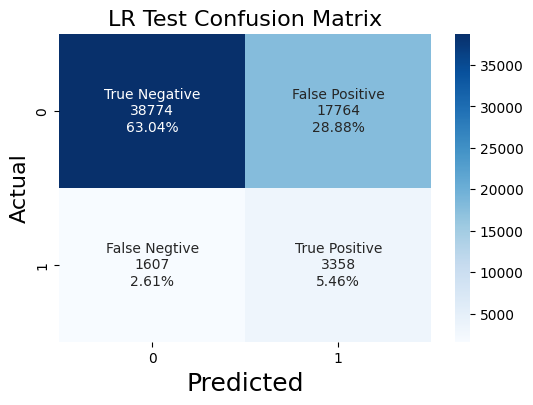

In [92]:
cf_matrix_test =confusion_matrix(y_test,predictions_test)
plt.figure(figsize=(6,4))
group_names = ['True Negative','False Positive','False Negtive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.title('LR Test Confusion Matrix',fontsize=16)

In [93]:
3358/(3358+17764)

0.15898115708739702

### 4.1.3 Model Explainabilty using Shap Plot

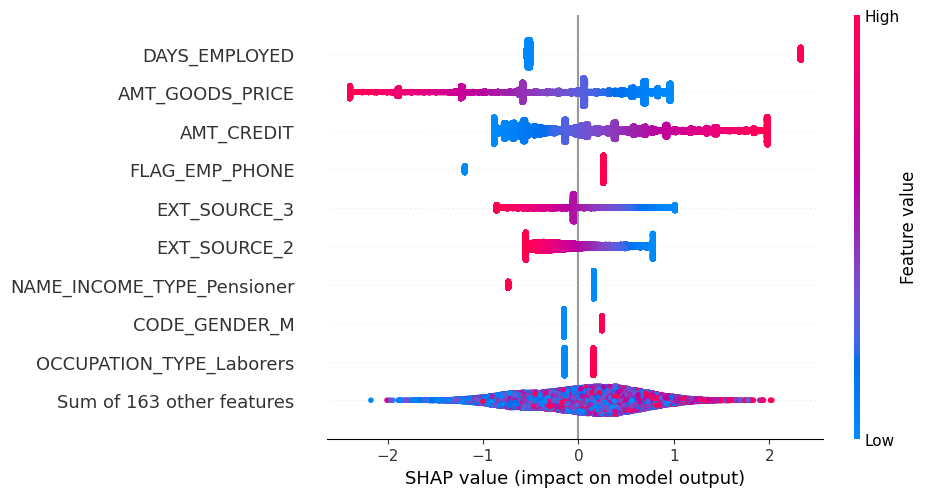

In [94]:
import shap
import matplotlib.pyplot as plt

explainer = shap.LinearExplainer(lr_model,X_test)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

## 4.2  Model 2: Random Forest

### 4.2.1 Random Forest Model Training & Evaluation Precision & Recall

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
RF = RandomForestClassifier(max_depth=8,
                            n_estimators=180,
                            class_weight='balanced')
RF.fit(X_train.values, y_train.values)
predictions_train = RF.predict(X_train.values)
print("="*80)
print("Precision Train",precision_score(y_train,predictions_train))
print("-"*80)
print("Recall Train",recall_score(y_train,predictions_train))
print("="*80)

predictions_test = RF.predict(X_test.values)
print("="*80)
print("Precision Test",precision_score(y_test,predictions_test))
print("-"*80)
print("Recall Test",recall_score(y_test,predictions_test))
print("="*80)

Precision Train 0.1644512055247685
--------------------------------------------------------------------------------
Recall Train 0.6858509566968781
Precision Test 0.15704625637005096
--------------------------------------------------------------------------------
Recall Test 0.6455186304128903


### 4.2.2 Confusion Matrix Random Forest

Text(0.5, 1.0, 'Random Forest Test Confusion Matrix')

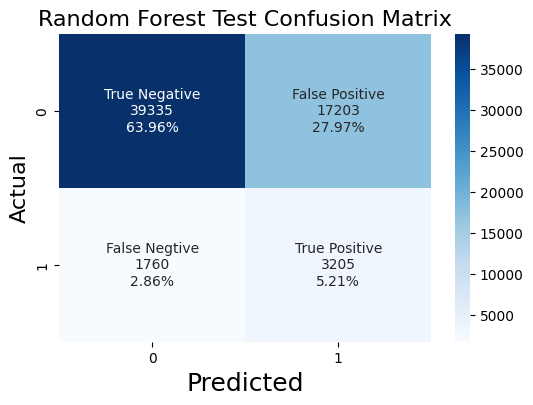

In [96]:
cf_matrix_test =confusion_matrix(y_test,predictions_test)
plt.figure(figsize=(6,4))
group_names = ['True Negative','False Positive','False Negtive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.title('Random Forest Test Confusion Matrix',fontsize=16)

## 4.3 Model 3: Light Gradient Boosted Machine

### 4.3.1 LGBM Training & Evaluation: Precision & Recall

In [97]:
import lightgbm as lgbm
lgb = lgbm.LGBMClassifier(n_estimators=30,
                          max_depth=8,
                          learning_rate=0.1,
                          subsample=0.65,
                          class_weight='balanced',
                          random_state=27)
lgb.fit(X_train.values, y_train.values)
predictions_train = lgb.predict(X_train.values)
print("="*80)
print("Precision Train:",precision_score(y_train,predictions_train))
print("-"*80)
print("Recall Train:",recall_score(y_train,predictions_train))
print("="*80)

predictions_test = lgb.predict(X_test.values)
print("="*80)
print("Precision Test:",precision_score(y_test,predictions_test))
print("-"*80)
print("Recall Test:",recall_score(y_test,predictions_test))
print("="*80)

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.187401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3304
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 143
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Precision Train: 0.16191635550665434
--------------------------------------------------------------------------------
Recall Train: 0.6965256797583081
Precision Test: 0.15921682787116162
--------------------------------------------------------------------------------
Recall Test: 0.682980866062437


### 4.3.2 Confusion Matrix LGBM

Text(0.5, 1.0, 'LGBM Test Confusion Matrix')

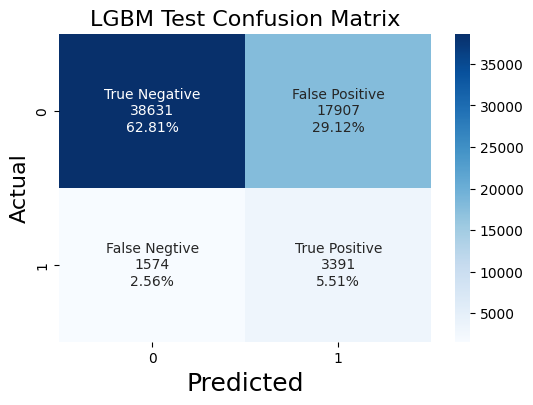

In [98]:
cf_matrix_test =confusion_matrix(y_test,predictions_test)
plt.figure(figsize=(6,4))
group_names = ['True Negative','False Positive','False Negtive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.title('LGBM Test Confusion Matrix',fontsize=16)

### 4.3.3 Model Explainalbilty using Shape Plot

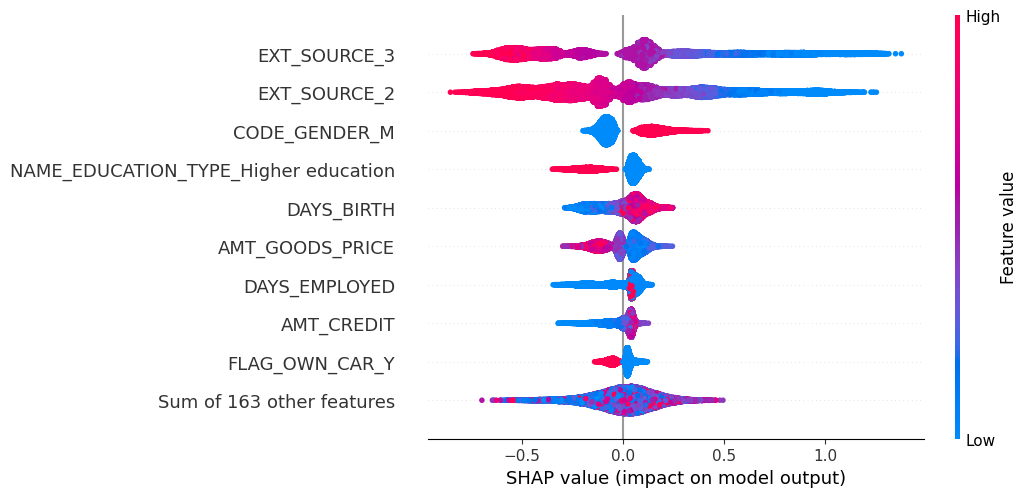

In [99]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(lgb)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

### 4.3.4 Feature Importance using LGBM

Top 20 Features:
Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'AMT_GOODS_PRICE',
       'DAYS_EMPLOYED', 'AMT_CREDIT', 'CODE_GENDER_M', 'AMT_ANNUITY',
       'NAME_EDUCATION_TYPE_Higher education', 'DAYS_ID_PUBLISH',
       'FLAG_DOCUMENT_3', 'NAME_CONTRACT_TYPE_Revolving loans',
       'FLAG_OWN_CAR_Y', 'DAYS_LAST_PHONE_CHANGE',
       'REGION_RATING_CLIENT_W_CITY', 'NAME_FAMILY_STATUS_Married',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_INCOME_TYPE_Working',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_TOTAL',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'DAYS_REGISTRATION',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'REG_CITY_NOT_LIVE_CITY',
       'REGION_RATING_CLIENT', 'REGION_POPULATION_RELATIVE',
       'OCCUPATION_TYPE_Core staff', 'FLAG_WORK_PHONE',
       'REG_CITY_NOT_WORK_CITY'],
      dtype='object')


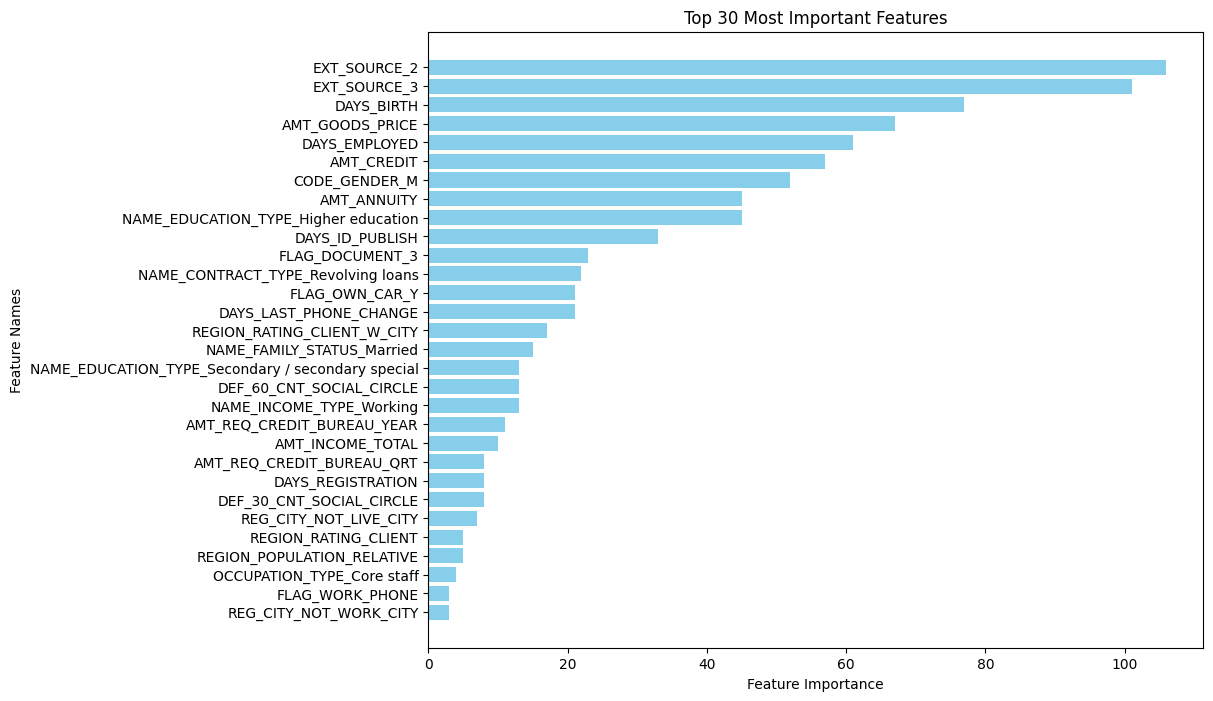

In [100]:
feature_importances=lgb.feature_importances_
sorted_indices= feature_importances.argsort()[::-1]

top_feature_names = X_train.columns[sorted_indices[:30]]
top_feature_importances = feature_importances[sorted_indices[:30]]
print("Top 20 Features:")
print(top_feature_names)

plt.figure(figsize=(10, 8))
plt.barh(top_feature_names, top_feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top 30 Most Important Features')
plt.gca().invert_yaxis()

## 4.4 Model 4: Feature Selected Model with LGBM

### 4.4.1 Feature Selection

In [101]:
X_train_final=X_train[top_feature_names]
X_test_final=X_test[top_feature_names]

### 4.4.2 LGBM Training

In [102]:
import lightgbm as lgbm
lgb = lgbm.LGBMClassifier(n_estimators=30,
                          max_depth=8,
                          learning_rate=0.1,
                          subsample=0.65,
                          class_weight='balanced',
                          random_state=27)
lgb.fit(X_train_final.values, y_train.values)
predictions_train = lgb.predict(X_train_final.values)
print("="*80)
print("Precision Train:",precision_score(y_train,predictions_train))
print("-"*80)
print("Recall Train:",recall_score(y_train,predictions_train))
print("="*80)

predictions_test = lgb.predict(X_test_final.values)
print("="*80)
print("Precision Test:",precision_score(y_test,predictions_test))
print("-"*80)
print("Recall Test:",recall_score(y_test,predictions_test))
print("="*80)

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.102938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2788
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Precision Train: 0.16289404579427036
--------------------------------------------------------------------------------
Recall Train: 0.690281973816717
Precision Test: 0.15984210776620536
--------------------------------------------------------------------------------
Recall Test: 0.6769385699899295


# **5 Conclusion**

In [103]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Sr.no.", "Model",
                 "Train Precision","Test Precision",
                 "Train Recall","Test Recall"]

x.add_row(["1","LR", "0.1582", "0.1589", "0.6757","0.6763"])
x.add_row(["2","RF", "0.1657", "0.1590", "0.6794","0.6439"])
x.add_row(["3","LGBM", "0.1619", "0.1592", "0.6965","0.6829"])
x.add_row(["4","LGBM with Feature Importance", "0.1628", "0.1598", "0.6902","0.6769"])
print(x)

+--------+------------------------------+-----------------+----------------+--------------+-------------+
| Sr.no. |            Model             | Train Precision | Test Precision | Train Recall | Test Recall |
+--------+------------------------------+-----------------+----------------+--------------+-------------+
|   1    |              LR              |      0.1582     |     0.1589     |    0.6757    |    0.6763   |
|   2    |              RF              |      0.1657     |     0.1590     |    0.6794    |    0.6439   |
|   3    |             LGBM             |      0.1619     |     0.1592     |    0.6965    |    0.6829   |
|   4    | LGBM with Feature Importance |      0.1628     |     0.1598     |    0.6902    |    0.6769   |
+--------+------------------------------+-----------------+----------------+--------------+-------------+
